In [1]:
!pip install yfinance

# if running locally, use the following:
# !pip install neuralprophet

# if running in colab, use the following:
!pip install git+https://github.com/ourownstory/neural_prophet.git numpy==1.23.5

  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-_k2uela_
  Running command git clone --filter=blob:none --quiet https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-_k2uela_
  Resolved https://github.com/ourownstory/neural_prophet.git to commit 7aac3beb54179389cb60e08263a0f309cabda917
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Library

Import the libraries.

In [2]:
import yfinance as yf
import pandas as pd
from neuralprophet import NeuralProphet
from neuralprophet.utils import set_random_seed

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda9SetDeviceEi'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Download the historical prices of the S&P500 index and prepare the DataFrame for modeling with NeuralProphet:

In [3]:
df = yf.download("HUBS") #$, start="2010-01-01", end="2023-11-22")
df = df[["Adj Close"]].reset_index(drop=False)
df.columns = ["ds", "y"]

[*********************100%%**********************]  1 of 1 completed


Create train/test split:

In [4]:
TEST_LENGTH = 60
df_train = df.iloc[:-TEST_LENGTH]
df_test = df.iloc[-TEST_LENGTH:]

In [5]:
df_train.head(3)

,ds,y
0,2014-10-09,30.100000
1,2014-10-10,29.049999
2,2014-10-13,27.250000


In [6]:
df_train.shape, df_test.shape

((2237, 2), (60, 2))

## Basic Model

This is something quick and dirty using default parameters. The code fits the data and makes a prediction in sample all at once.

In [7]:
# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("plotly")
metrics = m.fit(df_train)
forecast = m.predict(df_train)
m.plot(forecast)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.29% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.29% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
INFO - (NP.conf

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.29% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.29% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.29% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.29% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 35it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


## Building and Improving Models

From this section and on, we keep building complexity of our NeuralProphet model to increase the test set performance.

In [8]:
set_random_seed(42)
model = NeuralProphet(changepoints_range=0.95)
metrics = model.fit(df_train, freq="B")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.29% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.29% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

The following plots the training performance. You want to see the errors going down as `epoch` goes up.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

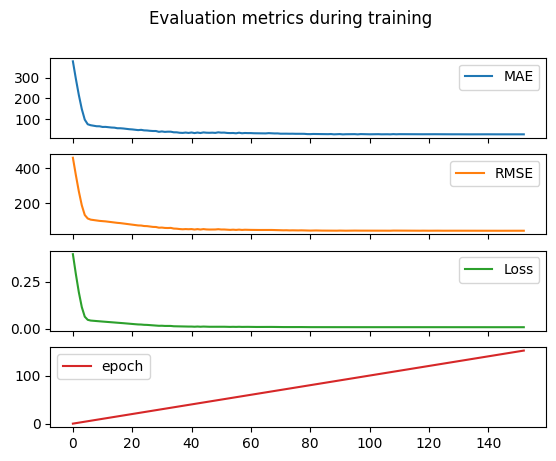

In [9]:
(
    metrics.drop(columns=["RegLoss"]).plot(
        title="Evaluation metrics during training",
        subplots = True
    )
)

Calculuate the predictions and plot the fit.

In [10]:
pred_df = model.predict(df)
pred_df.shape

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.343% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.343% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.343% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.343% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 35it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


(2297, 6)

### In-sample Prediction Plot

The following code plots the training performance using in-sample data. Most of the time the prediction `yhat` should follow the data `y`.

<Axes: title={'center': 'S&P 500 - forecast vs ground truth'}, xlabel='ds'>

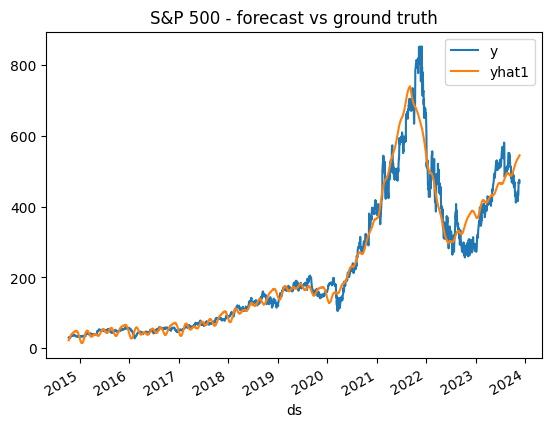

In [11]:
pred_df.plot(
    x="ds",
    y=["y", "yhat1"],
    title="S&P 500 - forecast vs ground truth"
)

The following produces out-of-sample (or also known as test set) performance. As indicated using `-TEST_LENGTH` the test data is defined in the beginning of the code.

In this case, since this is out-of-sample data, it is unlikely the first time you will see the prediction aligns with the data. You'll have to go back up to tune the parameters of the `neuralprophet` model.

<Axes: title={'center': 'S&P 500 - forecast vs ground truth'}, xlabel='ds'>

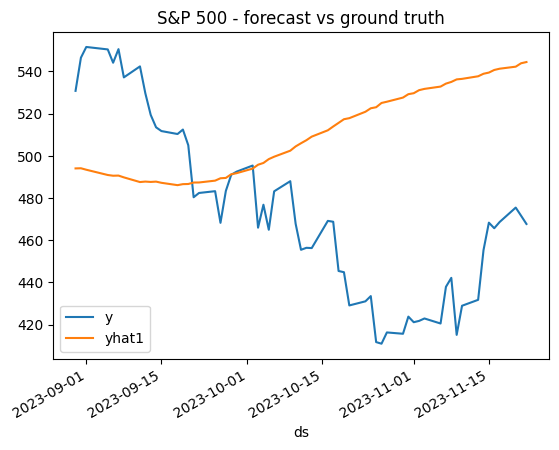

In [12]:
(
    pred_df.iloc[-TEST_LENGTH:].plot(
        x="ds",
        y=["y", "yhat1"],
        title="S&P 500 - forecast vs ground truth"
    )
)

### Add AR Terms

AR components are not included before.

Add the AR components to NeuralProphet:

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.29% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.29% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Added 82 missing dates.
INFO:NP.data.processing:Added 82 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 82 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 82 NaN values in column y were auto-imputed.
INFO:NP.data.processing:82 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.343% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.343% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.345% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.345% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Added 83 missing dates.
INFO:NP.data.processing:Added 83 missing dates.
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in 'y' column.
INFO:NP.data.processing:Dropped 1 rows at the end with NaNs in 'y' column.
WARNING - (NP.data.processing._handle_missing_data) - 83

Predicting: 37it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<Axes: title={'center': 'S&P500 - forecast vs ground truth'}, xlabel='ds'>

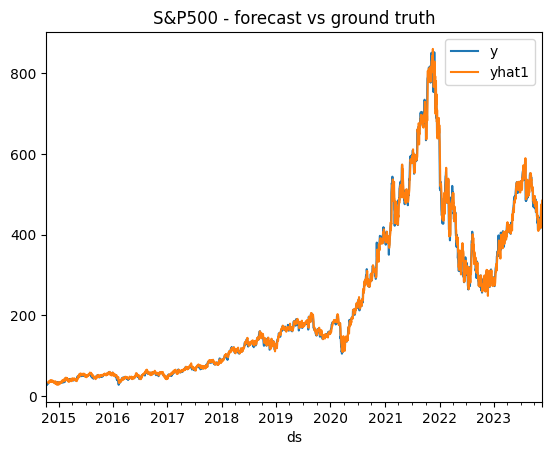

In [13]:
set_random_seed(42)
model = NeuralProphet(
    changepoints_range=0.95,
    n_lags=10,
    ar_reg=1,
)

metrics = model.fit(df_train, freq="B")

pred_df = model.predict(df)
pred_df.plot(x="ds", y=["y", "yhat1"],
             title="S&P500 - forecast vs ground truth")

The following plots the plot for out-of-sample performance. Usually for stock price prediction, `AR` terms have higher chance of bringing the prediction `yhat` to the data and make them align.

Simply put, if you see the two lines below are close to each other, it means the model does a good job at prediction on test set.

<Axes: title={'center': 'S&P500 - forecast vs ground truth'}, xlabel='ds'>

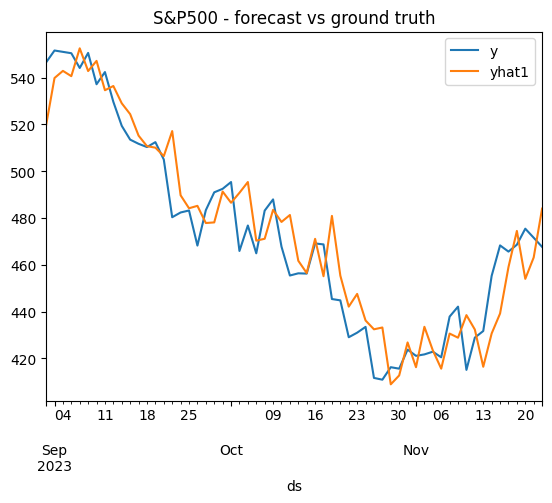

In [14]:
pred_df.iloc[-TEST_LENGTH:].plot(
    x="ds",
    y=["y", "yhat1"],
    title="S&P500 - forecast vs ground truth")

Add the AR-Net to NeuralProphet:

Warning: The following seems to be deprecated in an old package:

```py
num_hidden_layers=3,
d_hidden=32
```

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.29% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.29% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Added 82 missing dates.
INFO:NP.data.processing:Added 82 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 82 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 82 NaN values in column y were auto-imputed.
INFO:NP.data.processing:82 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.343% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.343% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.345% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.345% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Added 83 missing dates.
INFO:NP.data.processing:Added 83 missing dates.
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in 'y' column.
INFO:NP.data.processing:Dropped 1 rows at the end with NaNs in 'y' column.
WARNING - (NP.data.processing._handle_missing_data) - 83

Predicting: 37it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<Axes: title={'center': 'S&P500 - forecast vs ground truth'}, xlabel='ds'>

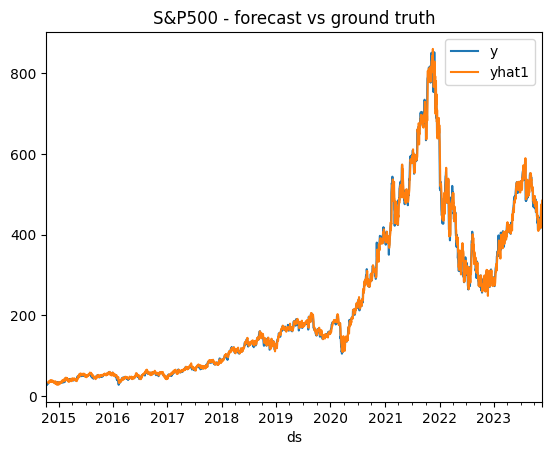

In [17]:
set_random_seed(42)
model = NeuralProphet(
    changepoints_range=0.95,
    n_lags=10,
    ar_reg=1,
    # num_hidden_layers=3,
    # d_hidden=32
)

metrics = model.fit(df_train, freq="B")

pred_df = model.predict(df)
pred_df.plot(x="ds", y=["y", "yhat1"],
             title="S&P500 - forecast vs ground truth")

<Axes: title={'center': 'S&P500 - forecast vs ground truth'}, xlabel='ds'>

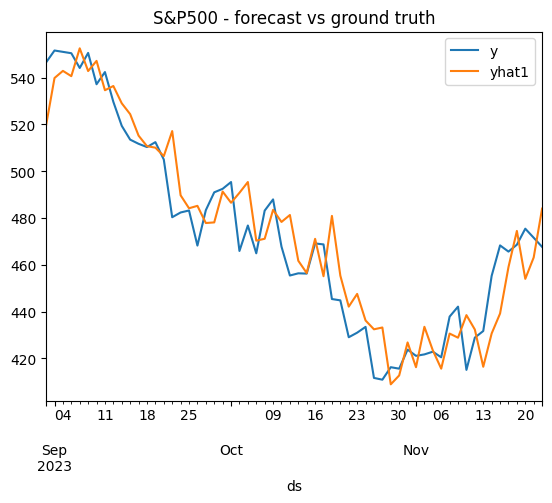

In [18]:
pred_df.iloc[-TEST_LENGTH:].plot(x="ds", y=["y", "yhat1"], title="S&P500 - forecast vs ground truth")

## Explainability

From here, we plot the components and parameters of the model. There are snippets of subplots generated from different components of the model such as yearly trend, monthly trend, weekly trend, and so on.

In [19]:
model.plot_components(model.predict(df_train))

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.29% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.29% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.291% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.291% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Added 82 missing dates.
INFO:NP.data.processing:Added 82 missing dates.
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in 'y' column.
INFO:NP.data.processing:Dropped 1 rows at the end with NaNs in 'y' column.
WARNING - (NP.data.processing._handle_missing_data) - 82 m

Predicting: 37it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
